In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("../data/maintenance.csv")
df.sample(n=7,random_state=42)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
6252,6253,L53432,L,300.8,310.3,1538,36.1,198,0,No Failure
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,No Failure
1731,1732,M16591,M,298.3,307.9,1485,42.0,117,0,No Failure
4742,4743,L51922,L,303.3,311.3,1592,33.7,14,0,No Failure
4521,4522,L51701,L,302.4,310.4,1865,23.9,129,0,No Failure
6340,6341,H35754,H,300.5,309.9,1397,45.9,210,1,Tool Wear Failure
576,577,H29990,H,297.7,309.7,1440,51.1,191,0,No Failure


In [3]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [15]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
features = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]

In [5]:
features.sample(n=7,random_state=1)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9953,298.1,307.8,1565,35.3,119
3850,302.3,311.0,1421,41.3,182
4962,304.0,312.7,1456,51.2,160
3886,302.4,311.3,1392,50.5,51
5437,302.9,312.6,1394,46.4,82
8517,298.3,309.6,1469,54.8,191
2041,299.1,308.9,1680,27.2,110


In [6]:
features.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [8]:
features.isna().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
dtype: int64

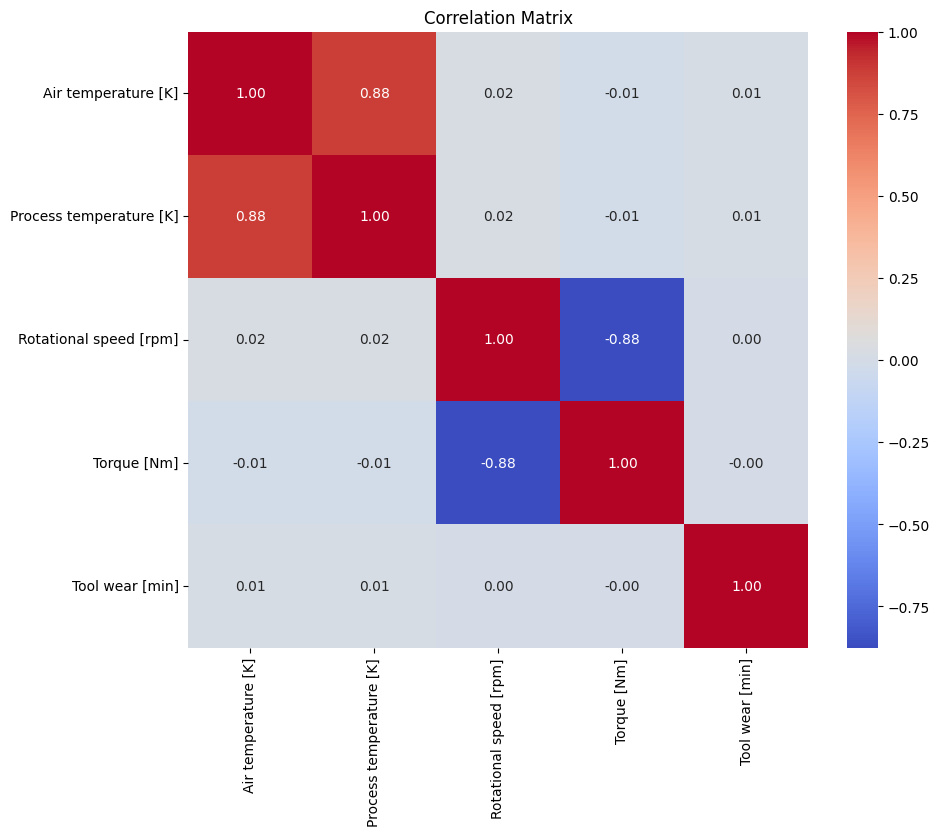

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = features.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

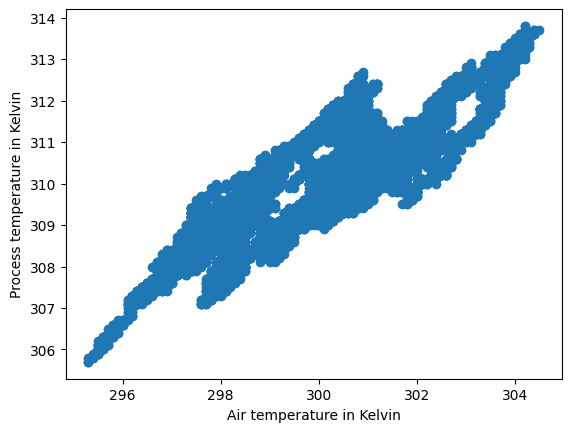

In [10]:
plt.scatter(features['Air temperature [K]'],features['Process temperature [K]'])
plt.xlabel('Air temperature in Kelvin')
plt.ylabel('Process temperature in Kelvin')
plt.show()

In [18]:
import pandas as pd

# Sample DataFrame with a column containing string values
# data = {'col1': [1, 2, '3', 4, '5']}
# df = pd.DataFrame(data)

# Define the expected data type for the column
expected_dtype = int
negative_indices = []
# Detect mismatching data types
mismatch_indices = []
for index, value in df['Target'].items():
    if not isinstance(value, expected_dtype):
        mismatch_indices.append(index)
    if value < 0:
        negative_indices.append(index)

# Print indices of rows with mismatching data types
print("Indices of rows with mismatching data types:", mismatch_indices)
print("Miss mathch count: ", len(mismatch_indices))
print("Indices of rows with mismatching data types:", negative_indices)
print("count of negative values: ", len(negative_indices))



Indices of rows with mismatching data types: []
Miss mathch count:  0
Indices of rows with mismatching data types: []
count of negative values:  0
